In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast
from datetime import date

In [260]:
recipe = pd.read_csv('../../../data/RAW_recipes.csv')
recipe[['name', 'description']] = recipe[['name', 'description']].fillna('')
recipe.head(10)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",,"['milk', 'vanilla ice cream', 'frozen apple ju...",4
6,aww marinated olives,25274,15,21730,2002-04-14,"['15-minutes-or-less', 'time-to-make', 'course...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,my italian mil was thoroughly impressed by my ...,"['fennel seeds', 'green olives', 'ripe olives'...",9
7,backyard style barbecued ribs,67888,120,10404,2003-07-30,"['weeknight', 'time-to-make', 'course', 'main-...","[1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0]",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22
8,bananas 4 ice cream pie,70971,180,102353,2003-09-10,"['weeknight', 'time-to-make', 'course', 'main-...","[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...",8,"['crumble cookies into a 9-inch pie plate , or...",,"['chocolate sandwich style cookies', 'chocolat...",6
9,beat this banana bread,75452,70,15892,2003-11-04,"['weeknight', 'time-to-make', 'course', 'main-...","[2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0]",12,"['preheat oven to 350 degrees', 'butter two 9x...",from ann hodgman's,"['sugar', 'unsalted butter', 'bananas', 'eggs'...",9


In [32]:
print(recipe.shape)

(231637, 12)


In [268]:
recipe_tags = recipe['tags'].apply(ast.literal_eval)
recipe_name = recipe['name']
recipe_description = recipe['description']

In [269]:
list_tags = list(set(recipe_tags.explode().values))
list_tags[:10]

['',
 'non-alcoholic',
 'jewish-sephardi',
 'seafood',
 'finnish',
 'food-processor-blender',
 'eggs-breakfast',
 'african',
 'apples',
 'british-columbian']

In [272]:
seasons = ['winter', 'spring', 'summer', 'fall']
mask = recipe_tags.apply(lambda tag: any(season in tag for season in seasons))
mask_winter = recipe_tags.apply(lambda tag: 'winter' in tag)
mask_spring = recipe_tags.apply(lambda tag: 'spring' in tag)
mask_summer = recipe_tags.apply(lambda tag: 'summer' in tag)
mask_fall = recipe_tags.apply(lambda tag: 'fall' in tag)

In [ ]:
mask_christmas = recipe_tags.apply(lambda tag: 'christmas' in tag)

In [273]:
mask_name = recipe_name.apply(lambda tag: any(season in tag for season in seasons))
mask_description = recipe_description.apply(lambda tag: any(season in tag for season in seasons))

In [274]:
mask_season = (mask_name) | (mask_description) | (mask)

In [275]:
print('le nombre de recettes avec au moins une saison dans le tag est', mask.sum())
print('la proportion de recette avec une saison est',
      f'{mask.sum()/recipe.shape[0]:.0%}')

le nombre de recettes avec au moins une saison dans le tag est 19896
la proportion de recette avec une saison est 9%


In [276]:
print('le nombre de recettes avec au moins une saison dans le tag/name/desc est', mask_season.sum())
print('la proportion de recette avec une saison est',
      f'{mask_season.sum()/recipe.shape[0]:.0%}')

le nombre de recettes avec au moins une saison dans le tag/name/desc est 27645
la proportion de recette avec une saison est 12%


In [62]:
(mask_winter & mask_christmas).sum()

np.int64(1429)

In [ ]:
print('number of winter', mask_winter.sum())
print('number of spring', mask_spring.sum())
print('number of summer', mask_summer.sum())
print('number of fall', mask_fall.sum())
print('number of christmas', mask_christmas.sum())

number of winter 7654
number of spring 4072
number of summer 10039
number of fall 7754
number of christmas 8145


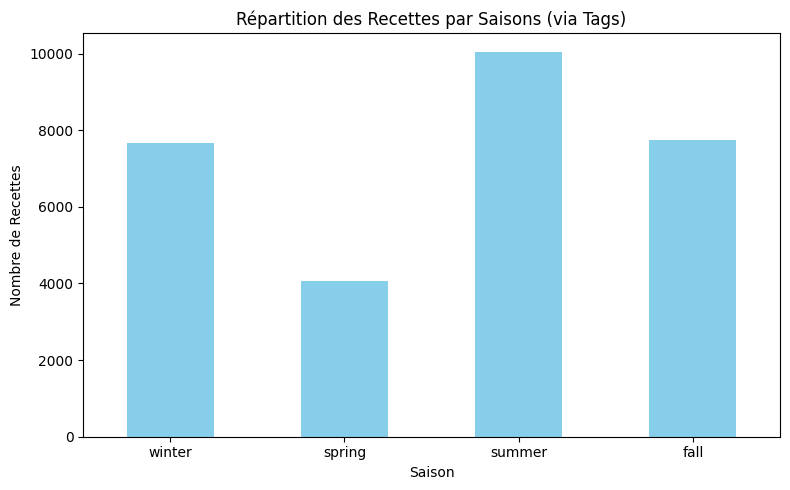

In [ ]:
counts = {'winter': mask_winter.sum(), 'spring': mask_spring.sum(),
          'summer': mask_summer.sum(), 'fall': mask_fall.sum()}
df_seasons_count = pd.Series(
    counts, name='Nombre de recettes').rename_axis('Saison')

plt.figure(figsize=(8, 5))
df_seasons_count.plot(kind='bar', color='skyblue')

plt.title('Répartition des Recettes par Saisons (via Tags)')
plt.ylabel('Nombre de Recettes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

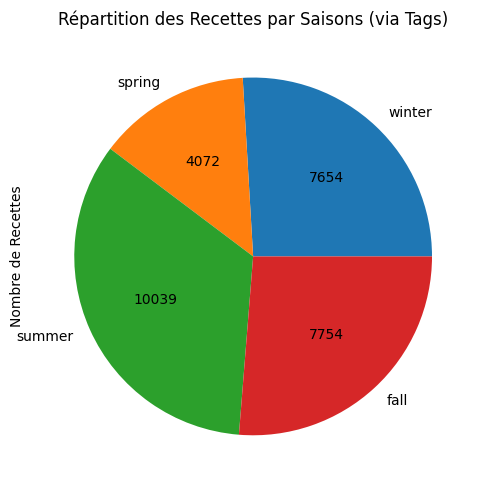

In [ ]:
def absolute_value(pct):
    absolute = int(round(pct/100.*total_recipes))
    return f"{absolute}"


plt.figure(figsize=(8, 5))
total_recipes = df_seasons_count.sum()
df_seasons_count.plot(kind='pie', color='skyblue', autopct=absolute_value)

plt.title('Répartition des Recettes par Saisons (via Tags)')
plt.ylabel('Nombre de Recettes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### **MOIS**

In [82]:
recipe['submitted'].values

array(['2005-09-16', '2002-06-17', '2005-02-25', ..., '2008-06-07',
       '2008-04-15', '2008-04-15'], shape=(231637,), dtype=object)

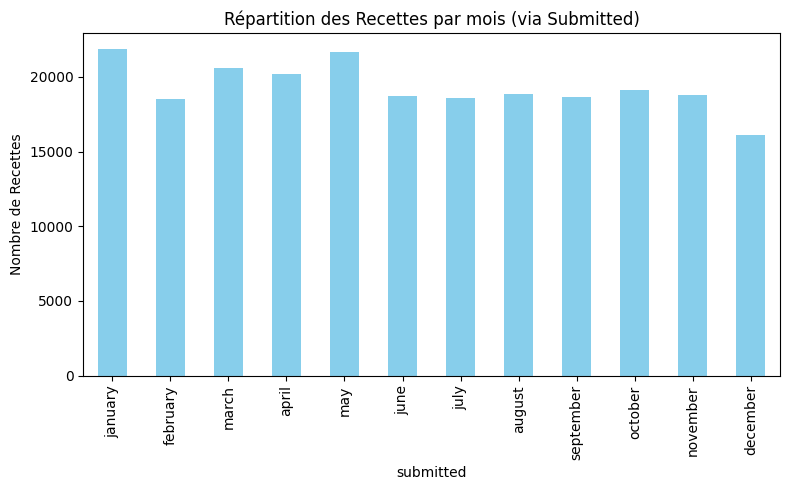

In [ ]:
dic_month = {1: 'january', 2: 'february', 3: 'march', 4: 'april', 5: 'may', 6: 'june',
             7: 'july', 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'}
chronological_months = list(dic_month.values())

df_month_count = recipe['submitted'].apply(
    lambda date_str: dic_month[int(date_str.split('-')[1])]).value_counts()
df_month_count_sorted = df_month_count.reindex(chronological_months)

plt.figure(figsize=(8, 5))
df_month_count_sorted.plot(kind='bar', color='skyblue')

plt.title('Répartition des Recettes par mois (via Submitted)')
plt.ylabel('Nombre de Recettes')
# plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
def get_season_from_date(date_str):
    year, month, day = map(int, date_str.split('-'))
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'


def get_season_from_tag(tag):
    tag_pp = ast.literal_eval(tag)
    return [season for season in seasons if season in tag_pp]

In [ ]:
recipe_pp = recipe.copy()
recipe_pp['tags'] = recipe_pp['tags'].apply(get_season_from_tag)
recipe_pp['submitted'] = recipe_pp['submitted'].apply(get_season_from_date)

In [104]:
recipe_pp.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,fall,"[winter, fall]","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,summer,[],"[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,winter,[],"[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13


In [ ]:
mask_correct = recipe_pp.apply(
    lambda row: row['submitted'] in row['tags'], axis=1)
print(f"Le nombre correct de recettes est : {mask_correct.sum()}")
print(
    f"La proportion de recettes correctes est : {mask_correct.sum()/mask.sum():.0%}")

Le nombre correct de recettes est : 11931
La proportion de recettes correctes est : 60%


In [221]:
import json
from pathlib import Path

path = Path("public_holiday_names_2025.json")
with path.open("r", encoding="utf-8") as f:
    names = json.load(f)['global_unique_names']


In [213]:
names

['1848 Revolution Memorial Day',
 '1956 Revolution Memorial Day',
 '2 January',
 'Adelaide Cup Day',
 'All Saints Day',
 "All Saints' Day",
 "All Saints' Day Eve",
 'All Saints’ Day',
 "All Souls' Day",
 'Amazigh New Year',
 'Anniversary of the Passing of General Martín Miguel de Güemes',
 'Annunciation',
 'Anzac Day',
 'Armed Forces Day',
 'Armistice Day',
 'Army Day',
 'Ascension Day',
 'Assumption',
 'Assumption Day',
 'Assumption of Mary',
 'Assumption of the Virgin Mary',
 'Atatürk Commemoration & Youth Day',
 'Auckland Anniversary Day',
 'August Holiday',
 'Australia Day',
 'Autumnal Equinox Day',
 'Azores Day',
 'Bank closing day',
 'Bastille Day',
 'Battle of Arica',
 'Battle of Boyacá',
 'Battle of the Boyne',
 'Belgian National Day',
 "Benito Juárez's birthday",
 'Black Awareness Day',
 'Bonifacio Day',
 'Boxing Day',
 'British Columbia Day',
 "Buddha's Birthday",
 'Canada Day',
 'Canberra Day',
 'Canterbury (South) Anniversary Day',
 'Canterbury Anniversary Day',
 'Carnival'

In [222]:
cleaned = pd.Series(names).apply(lambda s: s.lower())
cleaned.shape

(267,)

In [223]:
mask = pd.Series(list_tags).apply(lambda tag: tag in " ".join(cleaned.to_list()))
np.array(list_tags)[mask]

array(['', 'summer', 'chinese', 'fall', 'soul', 'spring', 'ramadan',
       'easter', 'czech', 'ham', 'christmas', 'birthday', 'thanksgiving',
       'picnic', 'german', 'belgian', 'swiss'], dtype='<U69')

In [204]:
'christmas' in cleaned.to_list()

True

In [277]:
cleaned.apply(lambda holiday: holiday in list_tags).sum()

np.int64(2)

In [183]:
'thanksgiving' in cleaned

False

In [184]:
'thanksgiving' in list_tags

True

In [176]:
cleaned

0      1848 revolution memorial 
1      1956 revolution memorial 
2                      2 january
3                  adelaide cup 
4                    all saints 
                 ...            
261                     women's 
262                    workers' 
263            world children's 
264                       youth 
265          zikra oued ed-dahab
Length: 265, dtype: object

In [186]:
'Thanksgiving' in cleaned

False

In [227]:
"chinese-new-year" in list_tags

True